# data set Zeeshan-ul-hassan Usmani, Shams-ul-Arfeen, Sana Rasheed,

Assassination of Pakistan’s Politicians (1951-2018), Kaggle, July 16, 2018.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading 
df=pd.read_csv("Attacks on Political Leaders in Pakistan.csv",engine='python')
df.head()

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,1,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,2,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"�Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,3,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,4,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,5,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0


In [3]:
#checking for missing values
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print("column name: ",column)
    print(missing_data[column].value_counts(),end='\n\n')

column name:  S#
False    51
Name: S#, dtype: int64

column name:  Politician
False    51
Name: Politician, dtype: int64

column name:  Day
False    51
Name: Day, dtype: int64

column name:  Date
False    51
Name: Date, dtype: int64

column name:  Day Type
False    51
Name: Day Type, dtype: int64

column name:  Time
False    51
Name: Time, dtype: int64

column name:  City
False    51
Name: City, dtype: int64

column name:  Location
False    51
Name: Location, dtype: int64

column name:  Location Category
False    48
True      3
Name: Location Category, dtype: int64

column name:  Province
False    51
Name: Province, dtype: int64

column name:  Latitude
False    51
Name: Latitude, dtype: int64

column name:  Longititude
False    51
Name: Longititude, dtype: int64

column name:  Target Category
False    51
Name: Target Category, dtype: int64

column name:  Space (Open/Closed)
False    51
Name: Space (Open/Closed), dtype: int64

column name:  Party
False    51
Name: Party, dtype: int64

c

In [4]:
df.dtypes

S#                       int64
Politician              object
Day                     object
Date                    object
Day Type                object
Time                    object
City                    object
Location                object
Location Category       object
Province                object
Latitude               float64
Longititude            float64
Target Category         object
Space (Open/Closed)     object
Party                   object
Target Status           object
Killed                   int64
Injured                  int64
dtype: object

# Correlation

In [5]:
df.corr()

,S#,Latitude,Longititude,Killed,Injured
S#,1.000000,0.129413,-0.094409,0.084453,-0.006224
Latitude,0.129413,1.000000,0.803216,-0.115029,-0.190656
Longititude,-0.094409,0.803216,1.000000,-0.167758,-0.155247
Killed,0.084453,-0.115029,-0.167758,1.000000,0.879478
Injured,-0.006224,-0.190656,-0.155247,0.879478,1.000000


# pearson correlation between Killed and Injured

In [6]:
from scipy import stats
pear_coeff,p_value=stats.pearsonr(df['Killed'],df['Injured'])
print(pear_coeff,p_value)

0.8794775493132039 2.0324317159843318e-17


positive relation , certainity is low

# plotting regplot for killed and Injured

(0.0, 578.0547451727373)

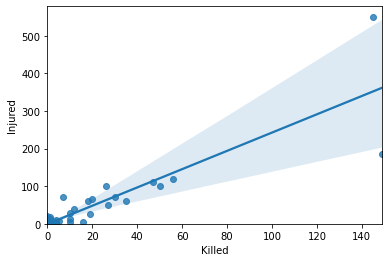

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.regplot(x='Killed',y='Injured',data=df)
plt.ylim(0,)

# Make new data frame which contains Province, Injured and Killed 

In [8]:
df_city=df[['Province' ,'Injured', 'Killed']]
df_city.head()

,Province,Injured,Killed
0,Punjab,1,1
1,Punjab,0,1
2,KPK,0,1
3,Sindh,0,1
4,Sindh,0,1


In [9]:
df_group=df_city.groupby(['Province'],as_index=False).mean()
df_group

,Province,Injured,Killed
0,Balochistan,29.142857,23.428571
1,Capital,0.000000,2.000000
2,FATA,33.500000,16.500000
3,Fata,100.000000,50.000000
4,KPK,24.842105,10.315789
5,Punjab,29.000000,10.100000
6,Sindh,78.857143,21.571429


mean of injured and killed in each province

In [10]:
punjab = df[df['Province'] == 'Punjab']
print('Average People Injured in Province Punjab' , punjab['Injured'].mean())
print('Average People Killed in Province Punjab' , punjab['Killed'].mean())

Average People Injured in Province Punjab 29.0
Average People Killed in Province Punjab 10.1


In [11]:
sindh = df[df['Province'] == 'Sindh']
print('Average People Injured in Province Sindh' , punjab['Injured'].mean())
print('Average People Killed in Province Sindh' , punjab['Killed'].mean())

Average People Injured in Province Sindh 29.0
Average People Killed in Province Sindh 10.1


In [12]:
kpk = df[df['Province'] == 'KPK']
print('Average People Injured in Province Sindh' , punjab['Injured'].mean())
print('Average People Killed in Province Sindh' , punjab['Killed'].mean())

Average People Injured in Province Sindh 29.0
Average People Killed in Province Sindh 10.1


In [13]:
balochistan = df[df['Province']=='Balochistan']
print('Average People Injured in Balochistan' , balochistan['Injured'].mean())
print('Average People Killed in Province Balochistan' , balochistan['Killed'].mean())

Average People Injured in Balochistan 29.142857142857142
Average People Killed in Province Balochistan 23.428571428571427


people injured in Province Punjab in road side attacks

# TOTAL NUMBER OF TARGETS BY CATEGORIES

In [15]:
df.head()

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,1,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,2,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"�Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,3,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,4,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,5,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0


In [17]:
s=df[df['Killed']==1]
print("Targeted ",s['Killed'].value_counts())
s['Target Category'].value_counts()

Targeted  1    22
Name: Killed, dtype: int64


Target     19
Suicide     3
Name: Target Category, dtype: int64

# KILLED LOCATIONS

In [19]:
df['Location Category'].value_counts()

Residence          14
Road               11
Park/Ground         5
Market              4
Government          4
UNKNOWN             2
Hotel               1
Office Building     1
University          1
Details Missing     1
Mobile              1
Transport           1
Religious           1
Funeral             1
Name: Location Category, dtype: int64

In [21]:
n=df[df['Killed']==0]
print(n['Killed'].value_counts())
n['Target Category'].value_counts()

0    5
Name: Killed, dtype: int64


Suicide    3
Target     2
Name: Target Category, dtype: int64

# MISSED TARGETS LOCATION CATEGORIES

In [22]:
df['Location Category'].value_counts()

Residence          14
Road               11
Park/Ground         5
Market              4
Government          4
UNKNOWN             2
Hotel               1
Office Building     1
University          1
Details Missing     1
Mobile              1
Transport           1
Religious           1
Funeral             1
Name: Location Category, dtype: int64

# KILLED CATEGORIES

In [23]:
s['Location Category'].value_counts()

Residence          7
Road               3
Market             2
Park/Ground        2
UNKNOWN            2
Mobile             1
Transport          1
University         1
Funeral            1
Details Missing    1
Name: Location Category, dtype: int64

#  KILLED POLITICIANS

In [24]:
s

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,1,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,2,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"�Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,3,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,4,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,5,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0
5,6,Hakim Muhammad Said,Saturday,17-Oct-98,Working Day,After Noon,Karachi,Details Missing,Details Missing,Sindh,24.991800,66.991100,Target,Open,Independent,Killed,1,0
10,11,Zil-e-Huma Usman,Tuesday,20-Feb-07,Working Day,After Noon,Gujranwala,she had gone to address a political rally,Park/Ground,Punjab,32.157962,74.024526,Target,Closed,Ministor,Killed,1,0
13,14,Abdul Razzaq Bugti,Friday,27-Jul-07,Working Day,After Noon,Quetta,�Zarghon Road 200 metres from Chief Minister�s...,Residence,Balochistan,30.209500,67.018200,Target,Closed,Baloch Student Organizaion,Killed,1,0
17,18,Miangul Asfandyar Amir Zeb,Friday,28-Dec-07,Working Day,After Noon,Swat,roadside bomb blast targeting his vehicle,Road,KPK,35.234672,71.885355,Target,Open,PMLN,Killed,1,0
22,23,Hussain Ali Yousafi,Monday,26-Jan-09,Working Day,After Noon,Quetta,UNKNOWN,UNKNOWN,Balochistan,30.209500,67.018200,Target,Open,Hazara Democratic Party�(HDP),Killed,1,0


In [25]:
print("targeted\n",s['Party'].value_counts())
print()
print("missed\n",n['Party'].value_counts())

targeted
 PPPP                               4
Independent                        2
PTI                                2
BNP                                1
ANP                                1
Ministor                           1
Hazara Democratic Party�(HDP)      1
MQM                                1
Student wing of PPP                1
Baloch Nationalist                 1
Baloch Student Organizaion         1
mqm                                1
National People's Party            1
Alll India Muslim League           1
Chief Minister of West Pakistan    1
Ministor of Miniroties             1
PMLN                               1
Name: Party, dtype: int64

missed
 Local Political Leader         1
Pro-Government tribal elder    1
MMA                            1
All Pakistan Muslim League     1
PMLN                           1
Name: Party, dtype: int64


# REALTION BETWEEN MISSED AND KILLED

(0.0, 1.05)

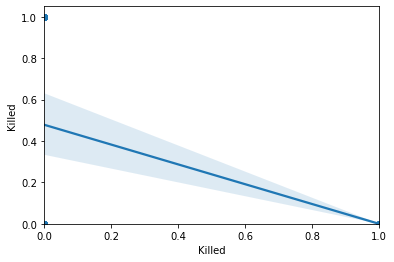

In [27]:
sns.regplot(x=df['Killed']==0,y=df['Killed']==1,data=df)
plt.ylim(0,)

In [30]:
#weak p value, strong negative coefficient value
stats.pearsonr(df['Killed']==0,df['Killed']==1)

(-0.2871563522102422, 0.04104074439409115)

# PPPP LEADERS KILLED

In [31]:
s[s['Party']=='PPPP']

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
2,3,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.42502,Target,Open,PPPP,Killed,1,0
30,31,Muhammad Aslam Khan Raisani,Tuesday,7-Dec-10,Working Day,Evening,Quetta,Railway level crossing sryab pattak,Transport,Balochistan,30.209500,67.01820,Suicide,Open,PPPP,Escaped,1,12
31,32,Salman Taseer,Tuesday,4-Jan-11,Working Day,After Noon,Islamabad,"Kohsar Market, near his home�in Sector F6,�Isl...",NaN,Capital,33.718000,73.07180,Target,Open,PPPP,Killed,1,0
32,33,Shahbaz Bhatti,Wednesday,2-Mar-11,Working Day,After Noon,Islamabad,Sector i-8,Residence,Capital,33.718000,73.07180,Target,Closed,PPPP,Killed,1,0


# PPPP LEADERS MISSED

In [32]:
n[n['Party']=='PPPP']

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured


# ANP LEADERS KILLED

In [49]:
s[s['Party']=='ANP']

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
33,34,Bashir Ahmed Bilour,Sunday,23-Dec-12,Holiday,After Noon,Peshawar,Qissa Khwani Bazar,Market,KPK,34.0043,71.5448,Suicide,Open,ANP,Killed,1,17


# ANP LEADERS MISSED

In [48]:
n[n['Party']=='ANP']

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured


# TOTAL NUMBER OF PEOPLE KILLED IN SUICIDE ATTACKS 

In [35]:
sum=0
for value in df[df['Target Category']=='Suicide']['Killed']:
    sum=sum+value
print("total killed in suicide attacks",sum)

total killed in suicide attacks 697


# TOTAL NUMBER OF PEOPLE INJURED IN SUICIDE ATTACKS

In [36]:
sum=0
for value in df[df['Target Category']=='Suicide']['Injured']:
    sum=sum+value
print("total Injured in suicde attacks",sum)

total Injured in suicde attacks 1702


# TOTAL NUMBER OF ATTACKS ON DIFFERENT POLITICAL PARTIES

In [37]:
df['Party'].value_counts()

PPPP                               8
ANP                                7
PMLN                               5
Local Political Leader             4
PTI                                3
All Pakistan Muslim League         2
Independent                        2
JUIF                               2
BAP                                1
MMA                                1
MQM                                1
Student wing of PPP                1
Alll India Muslim League           1
Chief Minister of West Pakistan    1
Ministor of Miniroties             1
Baloch Nationalist                 1
PMLQ                               1
National People's Party            1
Ministor                           1
Hazara Democratic Party�(HDP)      1
BNP                                1
Baloch Student Organizaion         1
Millat-i-Islamia                   1
Assistant Political Agent          1
Pro-Government tribal elder        1
mqm                                1
Name: Party, dtype: int64

In [38]:
df

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,1,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,2,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"�Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,3,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,4,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,5,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0
5,6,Hakim Muhammad Said,Saturday,17-Oct-98,Working Day,After Noon,Karachi,Details Missing,Details Missing,Sindh,24.991800,66.991100,Target,Open,Independent,Killed,1,0
6,7,Maulana Azam Tariq,Monday,6-Oct-03,Working Day,Evening,Islamabad,"As his car drove into the capital, Islamabad",Road,Capital,33.718000,73.071800,Target,Open,Millat-i-Islamia,Killed,4,0
7,8,Pervez Musharaf,Monday,15-Dec-03,Working Day,Evening,Rawalpindi,A powerful bomb went off minutes after his hig...,Road,Punjab,33.605800,73.043700,Target,Open,All Pakistan Muslim League,Escaped,0,0
8,9,Pervez Musharaf,Thursday,25-Dec-03,Working Day,Evening,Rawalpindi,Attack on Musharaf's Rally,Road,Punjab,33.605800,73.043700,Suicide,Open,All Pakistan Muslim League,Escaped,16,4
9,10,Shaukat Aziz,Friday,30-Jul-04,Working Day,Night,Attock,Jaffar village in fateh jang,Park/Ground,Punjab,33.764500,72.366700,Suicide,Open,PMLQ,Escaped,7,70


# DAY COUNT

Text(0.5, 1.0, 'Attacks Day Couting ')

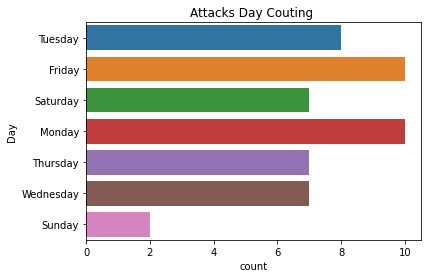

In [39]:
sns.countplot(y='Day', data = df)
ax = plt.gca()
ax.set_title('Attacks Day Couting ')


# PROVINCE COUNT

<AxesSubplot:xlabel='Province', ylabel='count'>

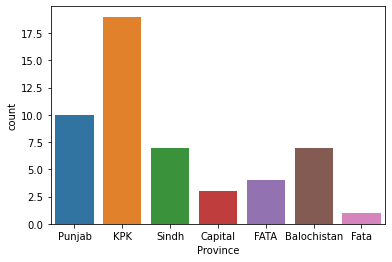

In [40]:
sns.countplot(x='Province', data = df)

# KILLED IN SUICIDAL ATTACKS

/home/hadi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Killed', ylabel='count'>

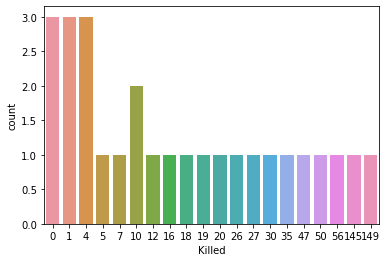

In [41]:
x=df[df['Target Category']=='Suicide']['Killed']
sns.countplot(x,data=df)

<AxesSubplot:xlabel='Day Type', ylabel='count'>

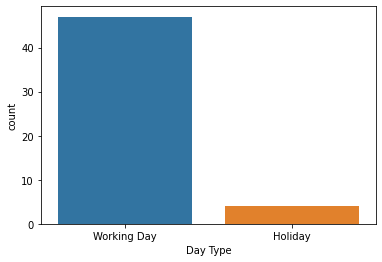

In [42]:
sns.countplot(x='Day Type',data=df)

<AxesSubplot:xlabel='Space (Open/Closed)', ylabel='count'>

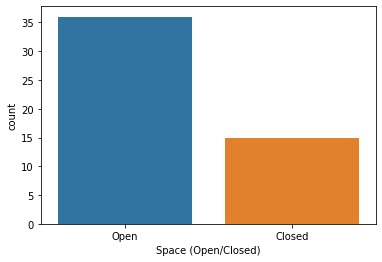

In [43]:
sns.countplot(x='Space (Open/Closed)',data=df)

In [44]:
df

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,1,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,2,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"�Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,3,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,4,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,5,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0
5,6,Hakim Muhammad Said,Saturday,17-Oct-98,Working Day,After Noon,Karachi,Details Missing,Details Missing,Sindh,24.991800,66.991100,Target,Open,Independent,Killed,1,0
6,7,Maulana Azam Tariq,Monday,6-Oct-03,Working Day,Evening,Islamabad,"As his car drove into the capital, Islamabad",Road,Capital,33.718000,73.071800,Target,Open,Millat-i-Islamia,Killed,4,0
7,8,Pervez Musharaf,Monday,15-Dec-03,Working Day,Evening,Rawalpindi,A powerful bomb went off minutes after his hig...,Road,Punjab,33.605800,73.043700,Target,Open,All Pakistan Muslim League,Escaped,0,0
8,9,Pervez Musharaf,Thursday,25-Dec-03,Working Day,Evening,Rawalpindi,Attack on Musharaf's Rally,Road,Punjab,33.605800,73.043700,Suicide,Open,All Pakistan Muslim League,Escaped,16,4
9,10,Shaukat Aziz,Friday,30-Jul-04,Working Day,Night,Attock,Jaffar village in fateh jang,Park/Ground,Punjab,33.764500,72.366700,Suicide,Open,PMLQ,Escaped,7,70


/home/hadi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


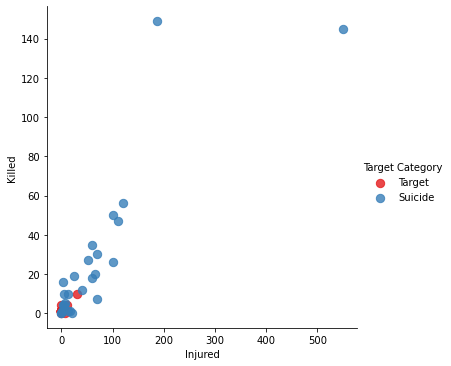

In [45]:
import seaborn as sns
sns.lmplot('Injured', 'Killed', data=df,
hue='Target Category', palette='Set1',
fit_reg=False, scatter_kws={"s": 70})

/home/hadi/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Attacks on Politicians in Pakistan')

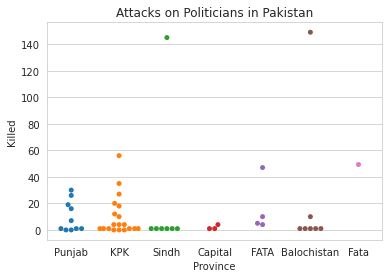

In [46]:
sns.set_style("whitegrid")
sns.swarmplot(x="Province", y="Killed", data=df)
ax = plt.gca()
ax.set_title('Attacks on Politicians in Pakistan')


In [47]:
df.loc(df['Killed'] ['Province'])

KeyError: 'Province'

In [ ]:
text = 'hi this is me, i don\' need to say my name though\.\*\!'
import re 
t = re.compile(r'[\'*!]')
t.findall(text)

In [28]:
df.head()

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,1,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,2,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"�Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,3,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,4,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,5,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0


In [39]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True, origin = 'julian')

ValueError: unit must be 'D' for origin='julian'

In [36]:
df.head()

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,1,Liaqat Ali Khan,Tuesday,2051-10-16,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,2,Khan abdul Jabbar Khan,Friday,2058-05-09,Working Day,Morning,Lahore,"�Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,3,Hayyat Sherpao,Friday,1985-02-08,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,4,Najeeb Ahmed,Friday,1990-04-06,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,5,Azeem Ahmed Tariq,Saturday,1993-05-01,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0
